In [ ]:
%cd /home/luzinsan/Documents/Obsidian/ML/Innopolis/material/1 semester/HDDA/labs/midterm/ 

In [1]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
from skimage import io
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

import time


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_moons, fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns


from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


Q1: Principal component analysis (PCA) - Detailed calculation of a PCA (based on theory)


For the data in Table 1, we ask you to perform the following operations “by hand” (you can use a
calculator, or program each step, but not use a single “PCA” function that calculates everything at
once)

In [117]:
import numpy as np
# Length and width of a newborn's skull
data = [191, 155, 195, 149, 181, 148, 183, 153, 176, 144, 208, 157, 189, 150,
197, 159, 188, 152, 192, 150, 179, 158, 183, 147, 174, 150, 190, 159, 188,
151, 163, 137, 195, 155, 186, 153, 181, 145, 175, 140, 192, 154, 174, 143,
176, 139, 197, 167, 190, 163]
x1 = [data[i] for i in range(0,len(data),2)]
x2 = [data[i] for i in range(1,len(data),2)]
X_origin = np.stack((x1,x2), axis=0).T

In [118]:
x1 = np.reshape(x1, (-1, 1))
x2 = np.reshape(x2, (-1, 1))

(a) Compute the mean vector x̄ and center the initial data. Do you think it is required to scale thedata ?


In [122]:
x1_mean = x1 - np.mean(x1)
x2_mean = x2 - np.mean(x2)

In [123]:
X = np.stack([x1_mean, x2_mean], axis=1).squeeze()
X

array([[  5.28,   3.88],
       [  9.28,  -2.12],
       [ -4.72,  -3.12],
       [ -2.72,   1.88],
       [ -9.72,  -7.12],
       [ 22.28,   5.88],
       [  3.28,  -1.12],
       [ 11.28,   7.88],
       [  2.28,   0.88],
       [  6.28,  -1.12],
       [ -6.72,   6.88],
       [ -2.72,  -4.12],
       [-11.72,  -1.12],
       [  4.28,   7.88],
       [  2.28,  -0.12],
       [-22.72, -14.12],
       [  9.28,   3.88],
       [  0.28,   1.88],
       [ -4.72,  -6.12],
       [-10.72, -11.12],
       [  6.28,   2.88],
       [-11.72,  -8.12],
       [ -9.72, -12.12],
       [ 11.28,  15.88],
       [  4.28,  11.88]])

(b) Calculate the sample covariance matrix A:

• performing operations manually (cov(X, Y ) = E[(X − E[X])(Y − E[Y ])] = E[XY ] − E[X]E[Y ]) where E[.] denotes the expected value operator.

by performing the matrix operations $X^T X/m$ with m denoting the number of data samples
(i.e., the size of the training set).

In [147]:
cov = (X.T @ X / X.shape[0])

with the cov operation in the numpy package

In [ ]:
cov = np.cov(X.T)

If significant differences appear, explain why. If yes, does it have an impact on the computation
of the top k principal components of data matrix $X ∈ R^{m×n}$ . (If you can’t answer this question,
move on to the others.)

(c) calculate the eigenvalues and eigenvectors of A using the command np.linalg.eig(A).

In [152]:
eigen_vals, eigen_vecs = np.linalg.eig(cov)
print("Eigenvalues: ", eigen_vals)
print("Eigenvectors: ", eigen_vecs)

Eigenvalues:  [131.51833373  18.13499961]
Eigenvectors:  [[ 0.82492945 -0.5652357 ]
 [ 0.5652357   0.82492945]]


(d) compute the percentage of the variance explained by each eigenvalue.

In [277]:
np.var(eigen_vecs[0]) * 100, np.var(eigen_vecs[1]) * 100
# The first has the best explained varience

(48.313978965655664, 1.6860210343443511)

(e) Plot the point cloud $x(i) = (x_1 , x_2 )^T ∈ R^2$ with 1 ≤ i ≤ m and represent the axes corresponding to
the principal components (v1 , v2 ) on the point cloud. To avoid distorting the perception of proximity
(or perpendicularity between components), use identical scales on the abscissa and ordinate.

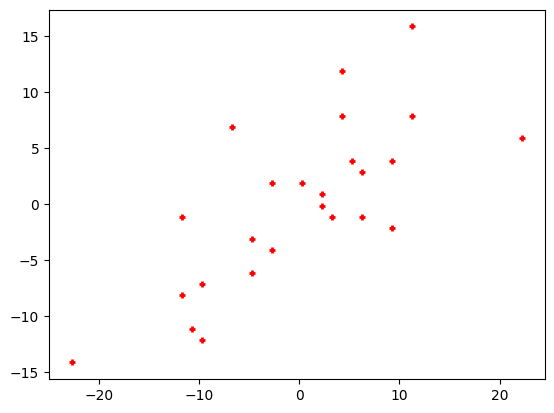

In [154]:
import matplotlib.pyplot as plt

In [166]:
# Draw a straight line y = ax + b with the abline(a,b) command.
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    return axes.plot(x_vals, y_vals, '--')

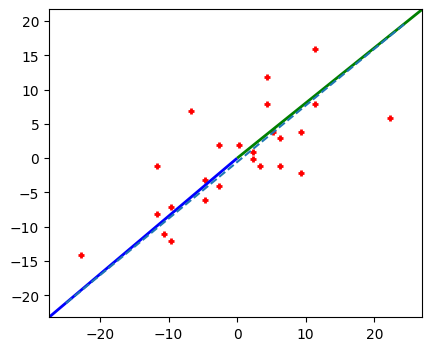

In [201]:
# Point cloud from x and y:

_, ax = plt.subplots(figsize=(10,4))
# to set the ratio between axes:
# ax = plt.gca()



ax = ax.scatter(x1_mean, x2_mean, s = 20, c = 'red', marker = '+', linewidth = 2)
ax = abline(*eigen_vecs[0])



# to draw some vectors z ∈ R2 , use for instance the quiver function from matplotlib :
origin = np.array([[0, 0],[0, 0]]) # origin point

ax = plt.gca()
ax.set_aspect(1)

xlim, ylim = ax.get_xlim(), ax.get_ylim()
abscissa = np.array(xlim)
ordinate = np.array(ylim)

ax = ax.quiver(*origin, abscissa, ordinate, color=['b','g'], scale=5)

(f) Calculate the linear regression for $x_2$ from $x_1$ (the best in the least squares sense), i.e. the regression
line $x_2 = θ_1 x_1 + θ_0$ minimizing the squared $l$2$ -norm of the prediction errors vector e such that

$e_i = x_2^{(i)} − (θ_1 x_1^{(i)} + θ_0 )$ for 1 ≤ i ≤ m

In [192]:
X_reg = np.c_[x1, np.ones(x1.shape[0])]
X_reg

array([[191.,   1.],
       [195.,   1.],
       [181.,   1.],
       [183.,   1.],
       [176.,   1.],
       [208.,   1.],
       [189.,   1.],
       [197.,   1.],
       [188.,   1.],
       [192.,   1.],
       [179.,   1.],
       [183.,   1.],
       [174.,   1.],
       [190.,   1.],
       [188.,   1.],
       [163.,   1.],
       [195.,   1.],
       [186.,   1.],
       [181.,   1.],
       [175.,   1.],
       [192.,   1.],
       [174.,   1.],
       [176.,   1.],
       [197.,   1.],
       [190.,   1.]])

In [186]:
linear_regression = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y

In [203]:
theta = linear_regression(X_reg, x2)
theta
print("Intercept: ",  theta[0],
      "\nSlope", theta[1])

Intercept:  [0.55479572] 
Slope [48.08333916]


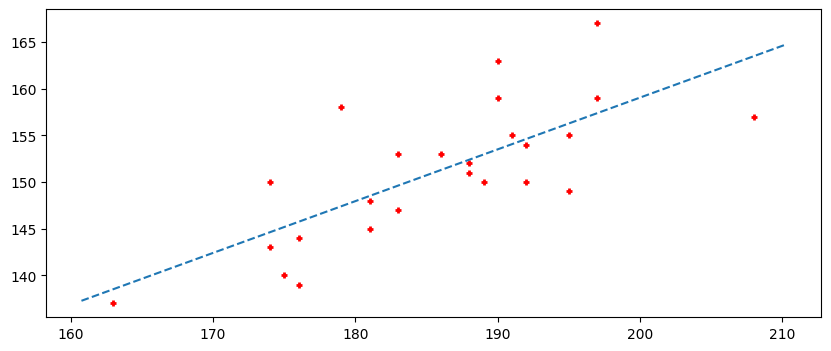

In [198]:
# Point cloud from x and y
_, ax = plt.subplots(figsize=(10,4))
ax = ax.scatter(x1, x2, s = 20, c = 'red', marker = '+', linewidth = 2)
# And linear regression line
ax = abline(*theta)

(g) Is this regression line identical to the first principal axis? Explain.

# 2. Q2: SVD and image compression

(a) First load the image (in color: RGB = red, green, blue) and convert it into a black & white image,
then into an A matrix with numpy, and check visually.

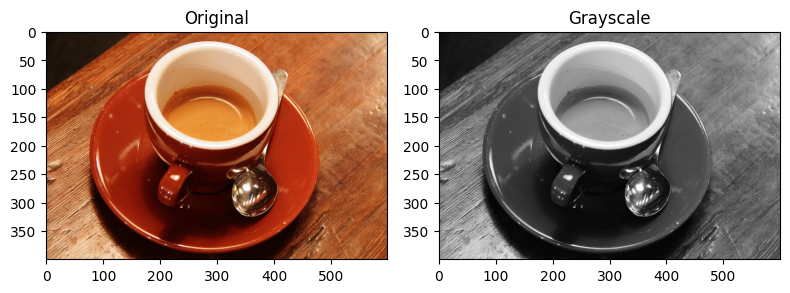

In [204]:
# Import useful modules
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage import data
images = (
'astronaut',
'binary_blobs',
'brick',
'colorwheel',
'camera',
'cat',
'checkerboard',
'clock',
'coffee',
'coins',
'eagle',
'grass',
'gravel',
'horse',
'logo',
'page',
'text',
'rocket',
)
# We select the "coffee" image
caller = getattr(data, 'coffee')
original = caller()
# Then we convert it in grayscale
grayscale = rgb2gray(original)
# Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
fig.tight_layout()
plt.show()

In [206]:
# We now convert the image into a matrix for processing with numpy
A = np.matrix(grayscale)
A

matrix([[0.05623333, 0.05651608, 0.04978902, ..., 0.73961804, 0.75166549,
         0.74579451],
        [0.05595059, 0.05651608, 0.05792275, ..., 0.73905255, 0.75081725,
         0.74297412],
        [0.05875608, 0.05846549, 0.05848824, ..., 0.73905255, 0.74494627,
         0.74886784],
        ...,
        [0.52715216, 0.64400353, 0.58801529, ..., 0.38923373, 0.37580941,
         0.31533412],
        [0.61655255, 0.59387137, 0.58352824, ..., 0.34640118, 0.31699294,
         0.31195529],
        [0.58801529, 0.57484392, 0.5757    , ..., 0.34721176, 0.30803373,
         0.29569569]])

(b) Perform an SVD on this matrix A, to determine the components U, S, V using the svd command
in numpy’s linalg library.

In [209]:
U, S, Vt = np.linalg.svd(A)
print("U = ", U.shape,
      "\nS = ", S.shape, 
      "\nVt = ", Vt.shape)

U =  (400, 400) 
S =  (400,) 
Vt =  (600, 600)


(c) Calculate an (approximate!) reconstruction of the image using only the first k rank-1 factors.
Visually check that the result corresponds (roughly) to the main features of the image (e.g. the
cup, the teaspoon next to the cup of coffee, · · · ). Write the formula for Ak . (the best rank-k
approximation of A with respect to any unitarily invariant norm).

In [211]:
def reconstruct_image(U, S, Vt, k):
    return U[:, :k] @ np.diag(S)[:k, :k] @ Vt[:k, :]

(d) Reconstruct with the first k = 2, 3, 4, 5, 10, 20, 30 and 100 rank-1 factors and display the results.

In [252]:
import seaborn as sns
import pandas as pd

In [254]:
reconstructed_A = reconstruct_image(U, S, Vt, 10)

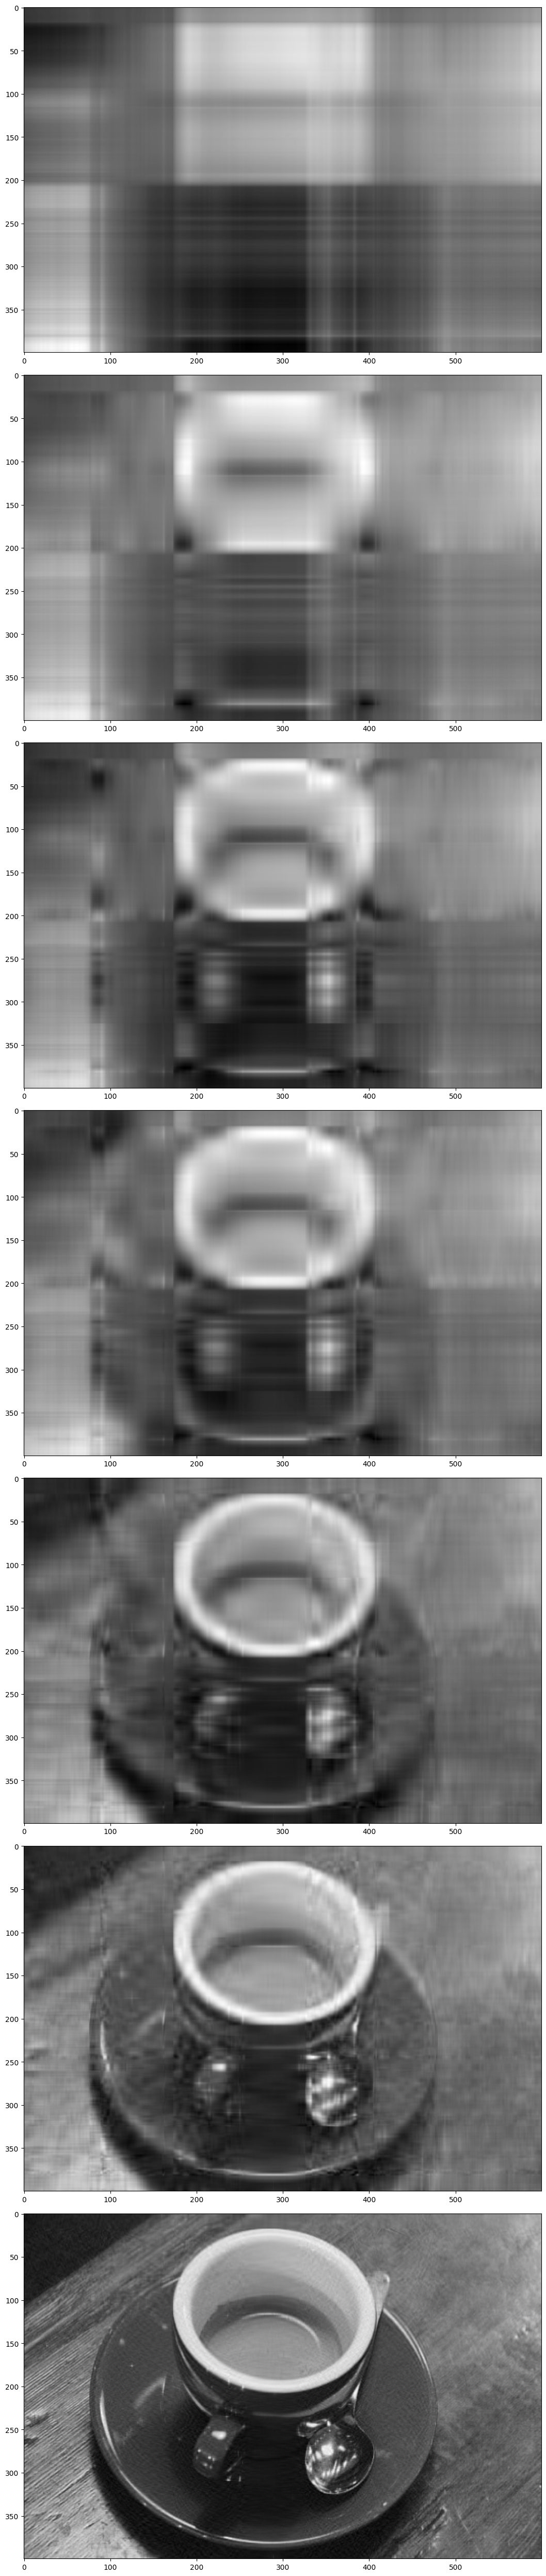

In [262]:
K = [2,
     3,4,5,10,20,100
     ]
fig, ax = plt.subplots(len(K), 1, 
                       figsize=(len(K)*4,50)
                       )

for idx, k in enumerate(K):
    reconstructed_A = reconstruct_image(U, S, Vt, k)
    ax[idx]  = ax[idx].imshow(reconstructed_A, cmap=plt.cm.gray)
    # ax[idx].set_title("k=",k)
    # plt.title("k=",k)
fig.tight_layout()
plt.show()

(e) When is a satisfactory reconstruction possible (for which value of k)? Support your claim by
showing the cumulative singular values plot for the the different values of k.
What kind of information bring the rank-1 factors for k in the interval [20, 30] to the approximation
? Display the result.

In [265]:
k = 10

In [266]:
reconstructed_A = reconstruct_image(U, S, Vt, k)

In [271]:
def reconstruction_error(A, reconstructed_A):
    return np.linalg.norm(A - reconstructed_A)


original_size = U.size + S.size + Vt.size
compressed_size_k = U[:, :k].size + S[:k].size + Vt[:k, :].size

(f) Estimate the corresponding compression ratio.

In [270]:
print(f"Original Size: {original_size}, Compressed Size for k={k}: {compressed_size_k}, Size Ration={compressed_size_k/original_size: 0.3}")
print('Error: ', reconstruction_error(A, reconstructed_A))

Original Size: 520400, Compressed Size for k=10: 10010, Size Ration= 0.0192
Error:  39.562033316686374
